In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [71]:
convert_matrix = np.array([[0.2, 0, 0], [0, 0.2, 0], [0, 0, 0.6]])

In [72]:
print(convert_matrix)

[[0.2 0.  0. ]
 [0.  0.2 0. ]
 [0.  0.  0.6]]


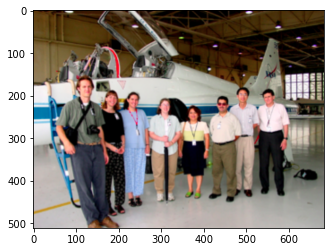

In [73]:
origin_image_BGR = cv2.imread("ori.png")
origin_image_RGB = cv2.cvtColor(origin_image_BGR, cv2.COLOR_BGR2RGB)

plt.imshow(origin_image_RGB)

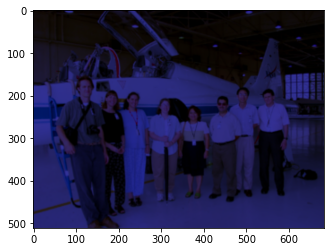

In [74]:
input_image = np.matmul(origin_image_RGB, convert_matrix).astype(np.uint8)
plt.imshow(input_image)

(511, 683, 3)


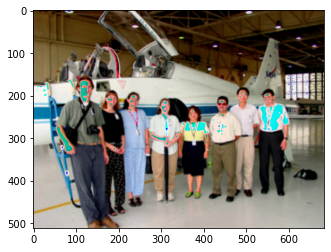

In [75]:
numMapping = 128
imgInput = input_image
imgTarget = origin_image_RGB

x = np.random.randint(imgInput.shape[0], size=(numMapping))
y = np.random.randint(imgInput.shape[1], size=(numMapping))

X = np.transpose([imgInput[x[i]][y[i]] for i in range(numMapping)]).astype(np.float)
Y = np.transpose([imgTarget[x[i]][y[i]] for i in range(numMapping)]).astype(np.float)
    
XXT = np.matmul(X, X.transpose())

invXXT = np.linalg.inv(XXT)

YXT = np.matmul(Y, X.transpose())

YXTinvXXT = np.matmul(YXT, invXXT)

image_result = np.matmul(input_image, YXTinvXXT).astype(np.uint8)

plt.imshow(image_result)
print(image_result.shape)

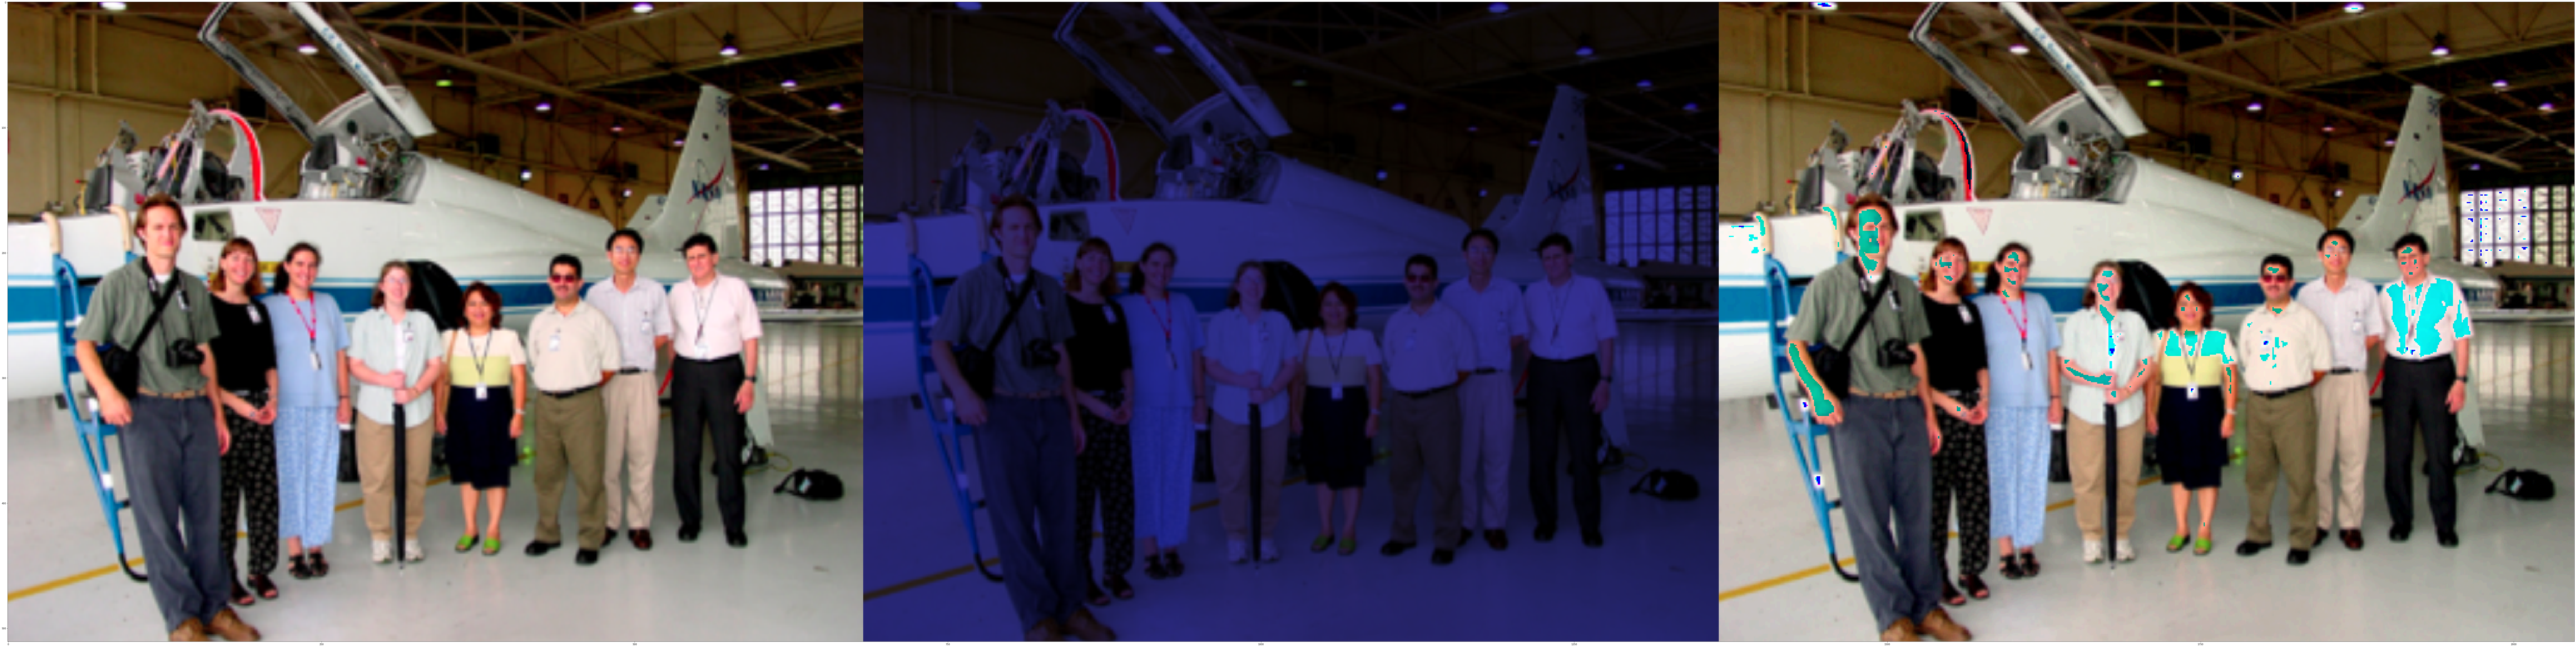

In [76]:
plt.figure(figsize=(200, 500))
plt.imshow(np.concatenate((origin_image_RGB, input_image, image_result), axis=1))